In [1]:
import numpy as np
from tqdm import tqdm
from collections import deque


def from_char(c):
    return 1 if c == "#" else 0

def from_string(s):
    return np.array([from_char(x) for x in s.strip()], dtype=np.int)

def to_string(arr):
    return ''.join(["#" if x else "." for x in arr])

def parse_input(text):
    lines = [l.strip() for l in text.splitlines() if l]
    plants = from_string(lines[0].split(": ")[1])
    transitions = {}
    for line in lines[1:]:
        pattern, center = line.split(" => ")
        transitions[tuple(from_string(pattern))] = from_char(center)
    return plants, transitions

def extend_if_necessary(plants, start_index, buffer=5):
    # add space at the ends if we need to
    add_left = max(0, buffer - np.argmax(plants))
    add_right = max(0, buffer - np.argmax(plants[::-1]))
    start_index -= add_left
    extended = np.r_[np.zeros(add_left), plants, np.zeros(add_right)]
    return extended.astype(int), start_index

def step(plants, transitions, start_index):
    stepped = np.zeros_like(plants)
    for i in range(2, len(plants) - 3):
        window = tuple(plants[i-2:i+2+1])
        stepped[i] = transitions.get(window, 0)
    return stepped, start_index

def play(plants, transitions, rounds=20, verbose=False):
    start_index = 0
    for i in tqdm(range(1, rounds+1)):
        plants, start_index = extend_if_necessary(plants, start_index)
        if verbose:
            print(f"{i:3}: @{start_index:3} {to_string(plants)}")
        plants, start_index = step(plants, transitions, start_index)
    return plants, start_index, final_score(plants, start_index)

def final_score(plants, start_index):
    numbers = np.arange(len(plants)) + start_index
    return plants.dot(numbers)

assert play(*parse_input("""initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #"""), rounds=20)[2] == 325

100%|██████████| 20/20 [00:00<00:00, 2831.22it/s]


In [2]:
with open("../inputs/12/input.txt", "r") as fp:
    text = fp.read()
    input_plants, input_transitions = parse_input(text)
    res = play(input_plants, input_transitions, rounds=20)
res[2]

100%|██████████| 20/20 [00:00<00:00, 1309.64it/s]


3915

### Part 2

100%|██████████| 1000/1000 [00:02<00:00, 400.98it/s]


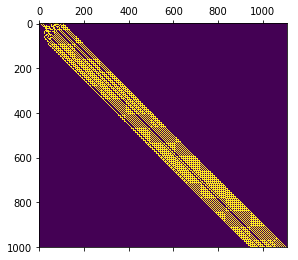

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

def track(plants, transitions, rounds):
    kept = []
    idxs = []
    start_index = 0
    for i in tqdm(range(1, rounds+1)):
        plants, start_index = extend_if_necessary(plants, start_index)
        plants, start_index = step(plants, transitions, start_index)
        kept.append(plants)
        idxs.append(start_index)
    return kept, idxs

def visualize_first_n(n):
    kept, idxs = track(input_plants, input_transitions, rounds=n)
    lens = np.array([len(k) for k in kept])
    start = idxs[lens.argmax()]
    compare = np.zeros((len(kept), lens.max()), dtype=np.int)
    for i, k in enumerate(kept):
        ix = idxs[i]
        a = ix - start
        b = a + len(k)
        compare[i, a:b] = k
    plt.matshow(compare, aspect=1)
    plt.show()
    
visualize_first_n(1000)

100%|██████████| 99/99 [00:00<00:00, 810.86it/s]


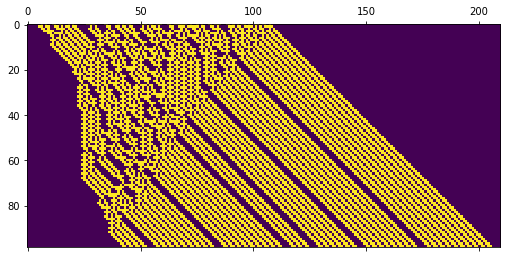

In [4]:
visualize_first_n(99)

In [5]:
def extrapolate_from_round_99(n):
    assert n >= 99
    delta = n - 99
    
    arr99, idx99, _ = play(input_plants, input_transitions, rounds=99)
    p_start, p_stop = arr99.argmax(), len(arr99) - arr99[::-1].argmax()
    repeating_pattern = arr99[p_start:p_stop]
    
    numbers = np.arange(len(arr99))[p_start:p_stop]
    numbers += idx99 + delta
    
    return numbers.dot(repeating_pattern)
    
_, _, score99 = play(input_plants, input_transitions, rounds=99)
assert extrapolate_from_round_99(99) == score99
extrapolate_from_round_99(50_000_000_000)

100%|██████████| 99/99 [00:00<00:00, 1318.96it/s]


4900000001793